In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
test_df.shape

(1459, 80)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending= False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [16]:
missing2 = test_df.isnull().sum()
missing2 = missing2[missing2>0].sort_values(ascending= False)
missing2

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64

In [17]:
cat_features_missing = train_df.select_dtypes(include = 'object').isnull().sum()
cat_features_missing = cat_features_missing[cat_features_missing > 0].sort_values(ascending= False)
cat_features_missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
Electrical         1
dtype: int64

In [18]:
cat_features_missing2 = test_df.select_dtypes(include = 'object').isnull().sum()
cat_features_missing2 = cat_features_missing2[cat_features_missing2 > 0].sort_values(ascending = False)
cat_features_missing2

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
KitchenQual        1
SaleType           1
dtype: int64

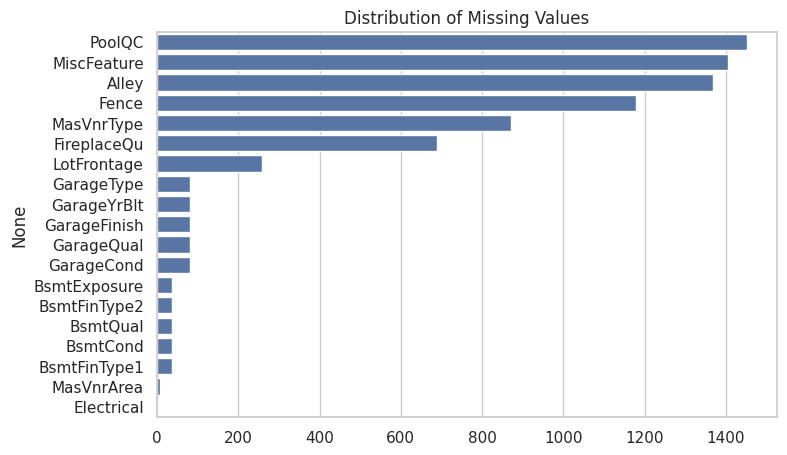

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(x = missing.values, y = missing.index)
plt.title('Distribution of Missing Values')
plt.show()

In [20]:
skewness = train_df.select_dtypes(include = 'number').skew().sort_values(ascending = False)
skewness.head(10)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
dtype: float64

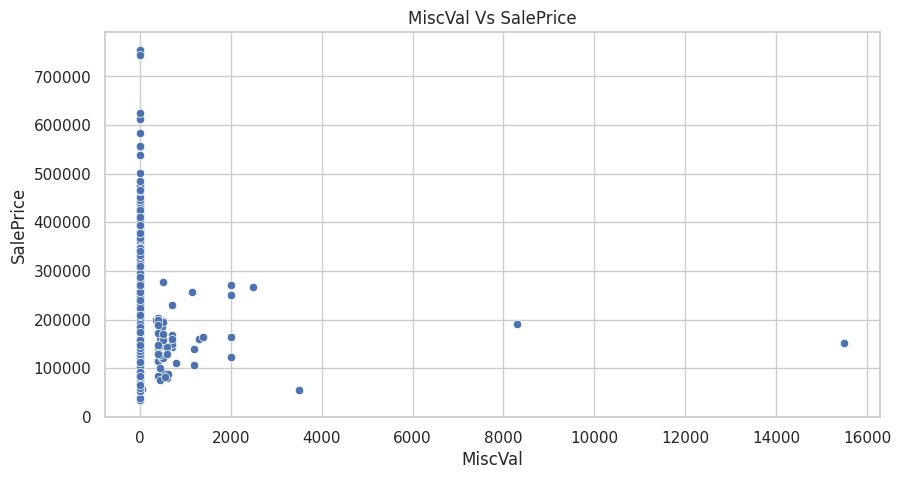

In [21]:
plt.figure(figsize = (10,5))
sns.scatterplot(x= 'MiscVal', y = 'SalePrice', data = train_df)
plt.title('MiscVal Vs SalePrice')
plt.show()

In [22]:
cat_features = train_df.select_dtypes(include = 'object').columns
impact = {}
for col in cat_features:
    impact[col] = train_df.groupby(col)['SalePrice'].mean().var()
impact_df = pd.Series(impact).sort_values(ascending= False)
impact_df.head(10)

PoolQC          2.641376e+10
ExterQual       1.480344e+10
KitchenQual     9.715970e+09
BsmtQual        8.905383e+09
Condition2      7.110827e+09
RoofMatl        6.365378e+09
FireplaceQu     6.200142e+09
Neighborhood    4.452252e+09
BsmtCond        4.431637e+09
MiscFeature     4.160344e+09
dtype: float64

In [23]:
none_features = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in none_features:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

test_df["Functional"] = test_df["Functional"].fillna("Typ")
test_df["Utilities"] = test_df["Utilities"].fillna("AllPub")



In [24]:
mode_features = [
    'Electrical', 'MSZoning', 'KitchenQual',
    'Exterior1st', 'Exterior2nd', 'SaleType'
]

for col in mode_features:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


In [25]:
zero_features = ['MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF',
    'GarageArea', 'GarageCars', 'BsmtFullBath','BsmtHalfBath']

for col in zero_features:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['YearBuilt'])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(train_df['YearBuilt'])

In [26]:
missing_values = test_df.isnull().sum().sort_values(ascending= False)
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values

Series([], dtype: int64)

Encoding Ordinal Features

In [27]:
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
ordinal_features = {
    'ExterQual': ['None','Po','Fa','TA','Gd','Ex'],
    'ExterCond': ['None','Po','Fa','TA','Gd','Ex'],
    'BsmtQual': ['None','Po','Fa','TA','Gd','Ex'],
    'BsmtCond': ['None','Po','Fa','TA','Gd','Ex'],
    'HeatingQC': ['None','Po','Fa','TA','Gd','Ex'],
    'KitchenQual': ['None','Po','Fa','TA','Gd','Ex'],
    'FireplaceQu': ['None','Po','Fa','TA','Gd','Ex'],
    'GarageQual': ['None','Po','Fa','TA','Gd','Ex'],
    'GarageCond': ['None','Po','Fa','TA','Gd','Ex'],
    'BsmtExposure': ['None','No','Mn','Av','Gd'],
    'BsmtFinType1': ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'BsmtFinType2': ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'GarageFinish': ['None','Unf','RFn','Fin'],
    'Functional': ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
}


In [29]:
ordinal_cols = list(ordinal_features.keys())
ordinal_categories = list(ordinal_features.values())
ord_encoder = OrdinalEncoder(categories = ordinal_categories)
train_df[ordinal_cols] = ord_encoder.fit_transform(train_df[ordinal_cols])
test_df[ordinal_cols] = ord_encoder.fit_transform(test_df[ordinal_cols])

In [30]:
train_df[ordinal_cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageFinish,Functional
0,4.0,3.0,4.0,3.0,5.0,4.0,0.0,3.0,3.0,1.0,6.0,1.0,2.0,7.0
1,3.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,3.0,4.0,5.0,1.0,2.0,7.0
2,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,2.0,6.0,1.0,2.0,7.0
3,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,1.0,5.0,1.0,1.0,7.0
4,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,3.0,6.0,1.0,2.0,7.0


In [31]:
nominal_features = train_df.select_dtypes(include = object).columns
nominal_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
#train_df = pd.get_dummies(train_df, columns=nominal_features, drop_first=True)
#test_df = pd.get_dummies(test_df, columns = nominal_features, drop_first= True)
all_data = pd.get_dummies(pd.concat([train_df.drop('SalePrice', axis = 1), test_df],axis = 0))
all_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,3.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,3.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,3.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,3.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,3.0,...,False,False,False,True,False,False,False,False,True,False


In [33]:
X_train = all_data.iloc[:len(train_df), :]
X_test = all_data.iloc[len(train_df):, :]
X_train.columns.equals(X_test.columns)

True

In [34]:
y = np.log1p(train_df.loc[X_train.index, "SalePrice"])
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 241 entries, Id to SaleCondition_Partial
dtypes: bool(190), float64(25), int64(26)
memory usage: 864.0 KB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1458
Columns: 241 entries, Id to SaleCondition_Partial
dtypes: bool(190), float64(25), int64(26)
memory usage: 863.4 KB


In [37]:
assert X_train.shape[1] == X_test.shape[1]
assert (X_train.columns == X_test.columns).all()

In [38]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

def rmse_cv(model):
    rmse = -cross_val_score(model, X_train, y, scoring= "neg_root_mean_squared_error", cv = kf)
    return rmse.mean()

In [39]:
lr = LinearRegression()
rmse_cv(lr)

np.float64(0.14983389254573903)

In [40]:
ridge = Ridge(alpha = 10)
rmse_cv(ridge)

np.float64(0.14557114115249606)

In [41]:
lasso = Lasso(alpha = 0.0005)
rmse_cv(lasso)

np.float64(0.14085884973479423)

In [42]:
rf = RandomForestRegressor(n_estimators= 300, max_depth= None, random_state= 42)
rmse_cv(rf)

np.float64(0.1434928516934177)

In [43]:
gbr = GradientBoostingRegressor(n_estimators= 300, learning_rate = 0.05,max_depth = 3, random_state = 42)
rmse_cv(gbr)

np.float64(0.1310179240075895)

In [44]:
xgb = XGBRegressor(n_estimators= 500, learning_rate = 0.05, max_depth = 4, subsample = 0.8,
                   colsample_bytree= 0.8, random_state = 42)
rmse_cv(xgb)

np.float64(0.12831552645538025)

In [45]:
models = [ridge, rf, gbr, xgb]

def ensemble_predict(X):
    preds = np.zeros(len(X))
    for model in models:
        model.fit(X_train, y)
        preds += model.predict(X)
    return preds / len(models)


In [46]:
test_preds_log = ensemble_predict(X_test)
test_preds_log

array([11.69790618, 11.94511346, 12.11719563, ..., 11.93800567,
       11.62910279, 12.30550437])

In [47]:
test_preds = np.expm1(test_preds_log)
test_preds


array([120318.52368271, 154061.47114329, 182990.61933697, ...,
       152970.3103836 , 112318.50302165, 220907.61083517])

In [48]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})

submission.to_csv('submission.csv', index=False)
